In [21]:
import pandas as pd
data = pd.read_csv("C:\\Projects\\nyt1.csv")
data = data[(data.Signed_In == 1) & (data.Age > 0)]
data

,Age,Gender,Impressions,Clicks,Signed_In
0,36,0,3,0,1
1,73,1,3,0,1
2,30,0,3,0,1
3,49,1,3,0,1
4,47,1,11,0,1
...,...,...,...,...,...
458432,30,0,4,0,1
458433,21,1,2,0,1
458434,61,1,6,0,1
458435,51,0,7,0,1


In [25]:

def age_group(age: int):
    if age <= 18:
        return "18"
    elif 18 < age <= 24:
        return "18-24"
    elif 25 <= age <= 34:
        return "25-34"
    elif 35 <= age <= 44:
        return "35-44"
    elif 45 <= age <= 54:
        return "45-54"
    elif 55 <= age <= 64:
        return "55-64"
    elif age >= 65:
        return "65+"
    return None

data["Age_Group"] = data.Age.apply(lambda x: age_group(x))
data_by_group = data.groupby(["Age_Group"], as_index=False).sum()
data_by_group

,Age_Group,Age,Gender,Impressions,Clicks,Signed_In
0,18,308677,12362,96240,2523,19252
1,18-24,750159,18829,176584,1709,35270
2,25-34,1716328,30958,290511,2937,58174
3,35-44,2798593,37676,355824,3662,70860
4,45-54,3181779,34007,322109,3232,64288
5,55-64,2661830,23988,224688,4556,44738
6,65+,2098644,10445,144120,4350,28753


<AxesSubplot: xlabel='Age_Group', ylabel='Clicks'>

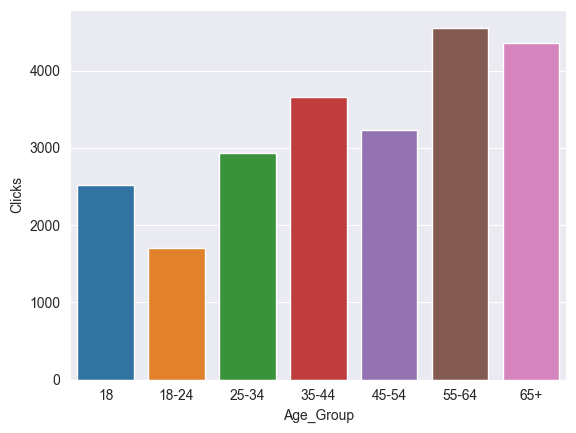

In [28]:
import seaborn as sns
sns.barplot(data=data_by_group,
            x=data_by_group.Age_Group,
            y=data_by_group.Clicks)

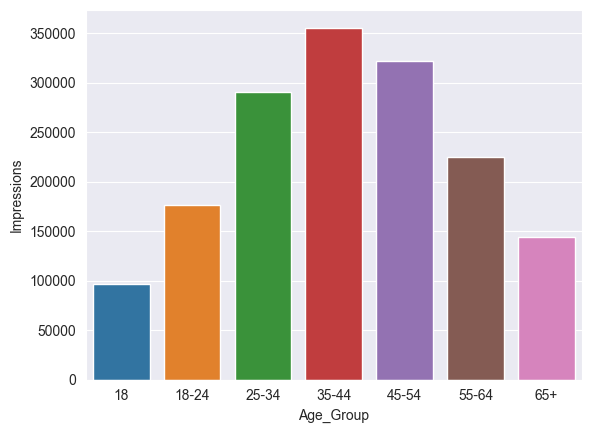

In [32]:
ax=sns.barplot(data=data_by_group,
            x=data_by_group.Age_Group,
            y=data_by_group.Impressions)

In [56]:
data_byCTR = data.groupby("Age_Group", as_index=False).sum()
data_byCTR["CTR"] = data_byCTR.Clicks / data_byCTR.Impressions
data_byCTR

,Age_Group,Age,Gender,Impressions,Clicks,Signed_In,CTR
0,18,308677,12362,96240,2523,19252,0.026216
1,18-24,750159,18829,176584,1709,35270,0.009678
2,25-34,1716328,30958,290511,2937,58174,0.010110
3,35-44,2798593,37676,355824,3662,70860,0.010292
4,45-54,3181779,34007,322109,3232,64288,0.010034
5,55-64,2661830,23988,224688,4556,44738,0.020277
6,65+,2098644,10445,144120,4350,28753,0.030183


In [81]:
data_byCTR.drop(["Age", "Impressions", "Clicks", "Signed_In", "Gender"], axis=1)
data_byCTR

,Age_Group,Age,Gender,Impressions,Clicks,Signed_In,CTR
0,18,308677,12362,96240,2523,19252,0.026216
1,18-24,750159,18829,176584,1709,35270,0.009678
2,25-34,1716328,30958,290511,2937,58174,0.010110
3,35-44,2798593,37676,355824,3662,70860,0.010292
4,45-54,3181779,34007,322109,3232,64288,0.010034
5,55-64,2661830,23988,224688,4556,44738,0.020277
6,65+,2098644,10445,144120,4350,28753,0.030183


<AxesSubplot: xlabel='Age_Group', ylabel='CTR'>

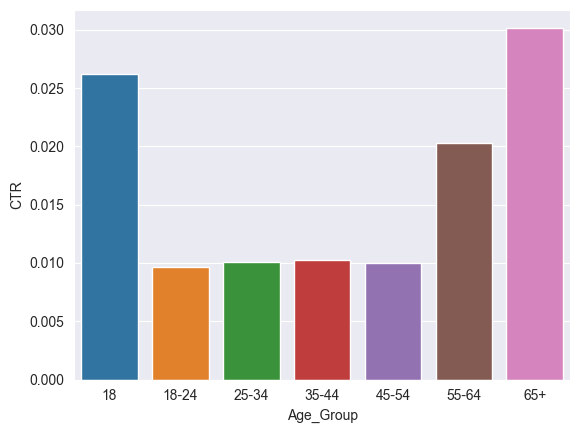

In [82]:
sns.barplot(data=data_byCTR,
           x=data_byCTR.Age_Group,
           y=data_byCTR.CTR)

<AxesSubplot: xlabel='Age_Group', ylabel='Impressions'>

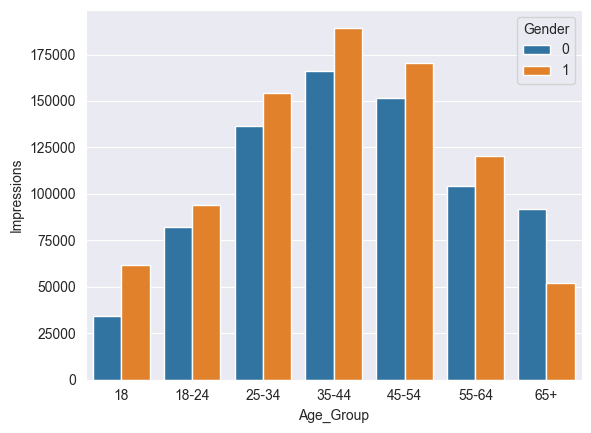

In [77]:
dataAgeAndGender = data.groupby(["Age_Group", "Gender"], as_index = False).sum()
dataAgeAndGender["CTR"] = dataAgeAndGender.Clicks / dataAgeAndGender.Impressions

dataCtrAndGender = data.groupby(["Age_Group", "Gender"], as_index = False).sum()
sns.barplot(data=dataAgeAndGender,
           x=dataAgeAndGender.Age_Group,
           y=dataAgeAndGender.Impressions,
           hue=dataCtrAndGender.Gender)

<AxesSubplot: xlabel='Age_Group', ylabel='Clicks'>

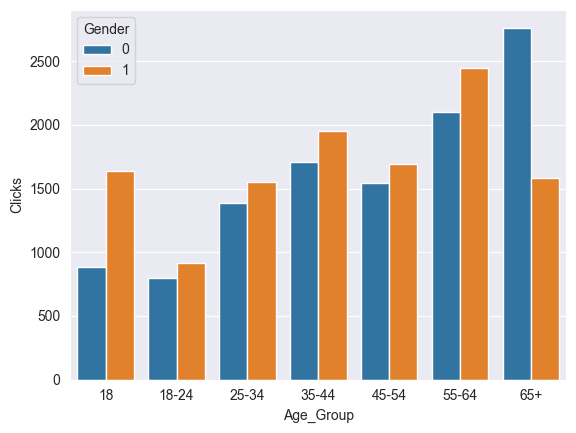

In [78]:
sns.barplot(data=dataAgeAndGender,
           x=dataAgeAndGender.Age_Group,
           y=dataAgeAndGender.Clicks,
           hue=dataCtrAndGender.Gender)

<AxesSubplot: xlabel='Age_Group', ylabel='CTR'>

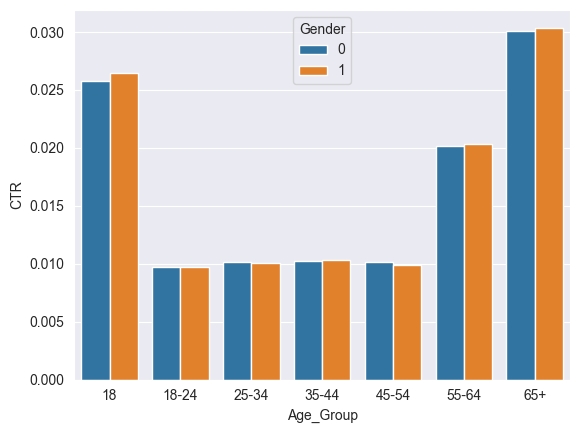

In [79]:
sns.barplot(data=dataAgeAndGender,
           x=dataAgeAndGender.Age_Group,
           y=dataAgeAndGender.CTR,
           hue=dataAgeAndGender.Gender)